# Pymaceuticals Inc.
---

### Analysis

- There appears to be a positive correlation between Mouse Weight and Tumor Size. 
- Capomulin and Ramicane appear to be better treatments than Infubinol and Ceftamin based on the distribution of Final Tumor Volumes for each group.
- Ramicane appears to be the best treatment due to the lowest mean Final Tumor Volume out of all the treatments.
- Based on a view of Tumor Volume vs Time for a single mouse treated with Capomulin, there was a significant drop off with Capomulin after about 20 days of the treatment.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combineddf= pd.merge(study_results,mouse_metadata,how="left", on="Mouse ID")

# Display the data table for preview
combineddf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
combineddf.nunique()["Mouse ID"]

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=combineddf[combineddf[["Mouse ID","Timepoint"]].duplicated()==True]
duplicateid=duplicates["Mouse ID"].unique()
duplicateid

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combineddf[combineddf['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf= combineddf[combineddf['Mouse ID']!='g989']
cleandf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
cleandf.nunique()["Mouse ID"]

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grp = cleandf.groupby('Drug Regimen')['Tumor Volume (mm3)']

summarytable=pd.DataFrame({"Mean Tumor Volume":grp.mean(),
                           "Median Tumor Volume":grp.median(),
                           "Tumor Volume Variance":grp.var(),
                           "Tumor Volume Std. Dev.":grp.std(),
                           "Tumor Volume Std. Err.":grp.sem()})
summarytable 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# Of Observed Mouse Timepoints'>

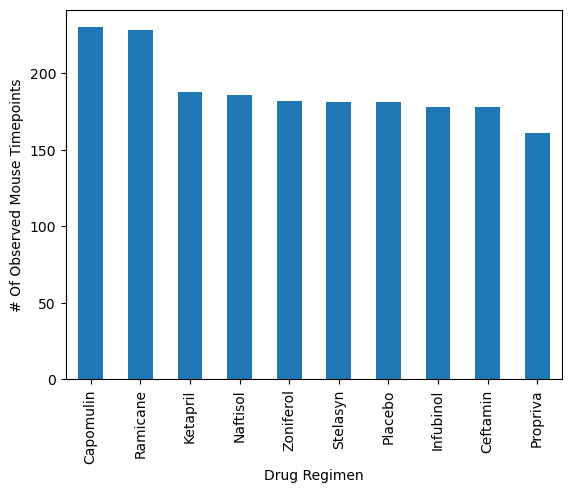

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimencount=combineddf["Drug Regimen"].value_counts()
drug_regimencount.plot(kind="bar", xlabel="Drug Regimen",ylabel="# Of Observed Mouse Timepoints")

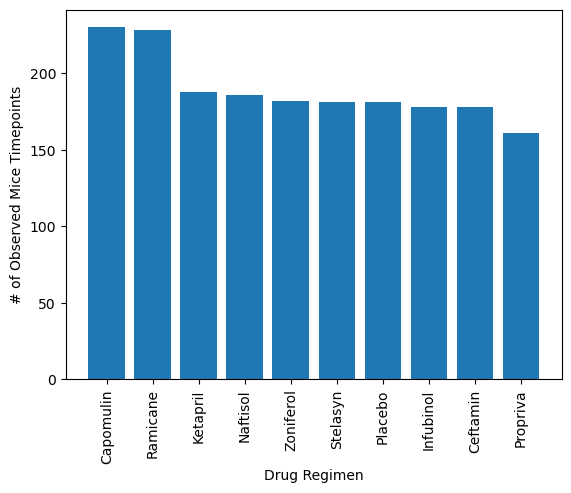

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
from importlib import reload
plt=reload(plt)
xaxis= drug_regimencount.index.values
yaxis=drug_regimencount.values
plt.bar(xaxis,yaxis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

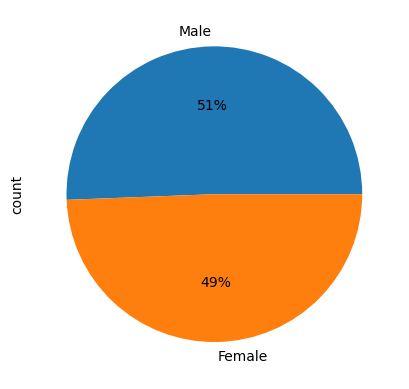

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=combineddf["Sex"].value_counts()
sex.plot(kind="pie",autopct="%1.0f%%")

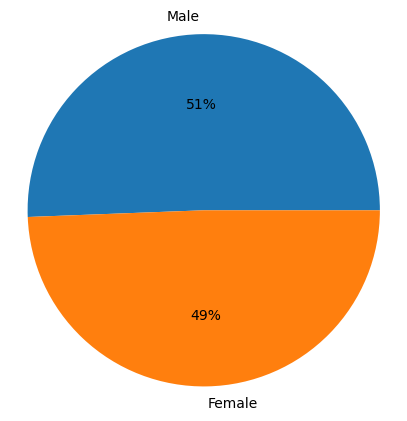

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label=sex.index.values
count=sex.values
plt.ylabel="Sex"
plt.figure(figsize=(5,5))
plt.pie(count,labels=label,autopct="%1.0f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped=cleandf.groupby("Mouse ID")
lasttimepoint=grouped["Timepoint"].agg("max").reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged=pd.merge(cleandf,lasttimepoint,on=["Mouse ID","Timepoint"],how="inner")

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvolume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatmentdata=merged.loc[merged["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    # add subset 
    tumorvolume.append(treatmentdata)
    # Determine outliers using upper and lower bounds
    quartiles=treatmentdata.quantile([.25,.5,.75])
    lower=quartiles[.25]
    upper=quartiles[.75]
    iqr=upper-lower
    lowerbound=lower-(1.5*iqr)
    upperbound=upper+(1.5*iqr)
    outliers=treatmentdata[(treatmentdata<lowerbound) | (treatmentdata>upperbound)]
    print(f"{drug}'s outliers:{outliers}")



Capomulin's outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers:20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

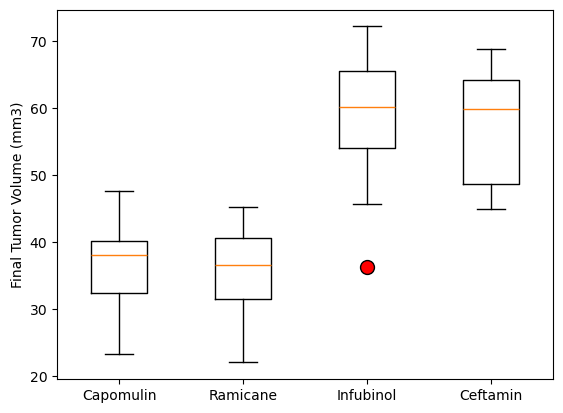

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumorvolume,labels=treatments,
            flierprops={'markerfacecolor':'red','markersize':10})
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

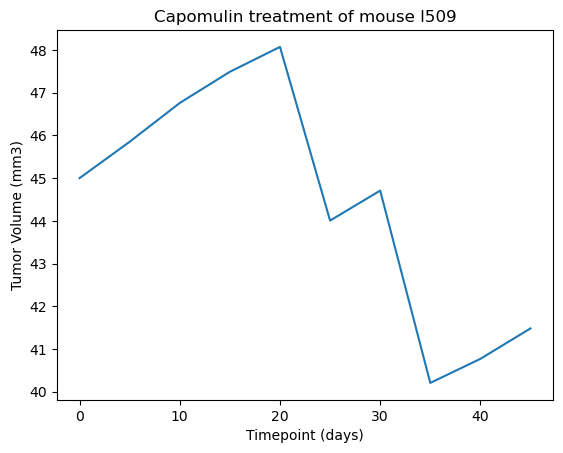

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
capomulin=combineddf[combineddf["Drug Regimen"]=="Capomulin"]
mouseid="l509"
mousedata=capomulin[capomulin["Mouse ID"]==mouseid]
plt.plot(mousedata["Timepoint"],mousedata["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouseid}")
plt.show()

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

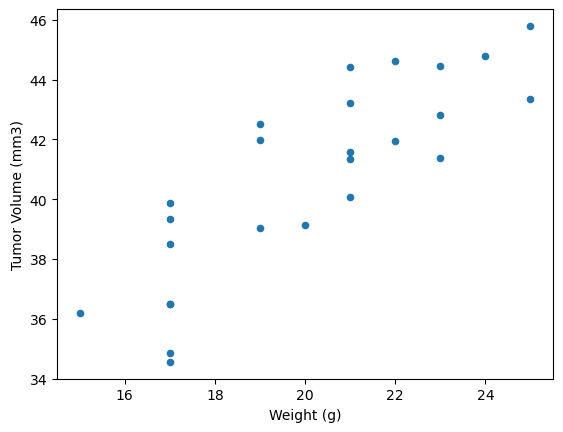

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_tumor = cleandf[cleandf['Drug Regimen']=='Capomulin'].groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
weight_tumor.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
            

## Correlation and Regression

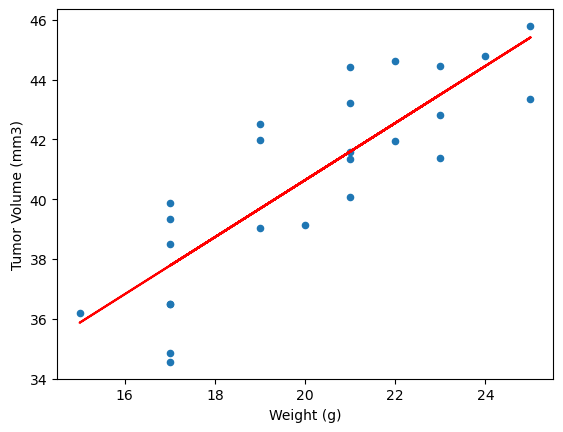

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = weight_tumor['Weight (g)']
y = weight_tumor['Tumor Volume (mm3)']
lr = st.linregress(x, y)
y_ = x*lr.slope+lr.intercept
weight_tumor.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
plt.plot(x, y_, color='red')